In [1]:
# Импорты и загрузка данных
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if '../src' not in sys.path:
    sys.path.append('../src')
from database import load_corrosion_data_new as load_data
from analysis import AdvancedCorrosionAnalyzer


In [2]:
# Настройки
sns.set(style='whitegrid')
TARGET = 'worst_corrosion_rate_mm_per_year'

# Загрузка
DF_loaded = load_data()
assert TARGET in DF_loaded.columns, 'В данных отсутствует corrosion_rate_mm_per_year'

print(f"Данные: {len(DF_loaded):,} строк, {len(DF_loaded.columns)} колонок")
print('Колонки:')
print(sorted(DF_loaded.columns.tolist()))

Данные: 143,060 строк, 45 колонок
Колонки:
['ammonia_content', 'avg_corrosion_rate_mm_per_year', 'chloride_aggressiveness', 'chlorine_content', 'co2_content', 'component_type_id', 'component_type_name', 'contour', 'corrosion_aggressiveness_index', 'corrosion_inhibitor_content', 'corrosion_protection_index', 'cross_sectional_area', 'diameter_to_thickness_ratio', 'equipment', 'equipment_age_years', 'h2s_aggressiveness_index', 'h2s_content', 'h2s_water_ratio', 'hydrochloric_acid_content', 'inner_diameter', 'installation', 'material_code', 'material_resistance_score', 'material_type', 'measurement_date', 'measurement_points_in_section', 'min_corrosion_rate_mm_per_year', 'nominal_thickness_mmc', 'operating_pressure', 'operating_temperature', 'outer_diameter', 'oxygen_content', 'pitting_corrosion_index', 'section_number', 'stress_corrosion_index', 'tmin_mmc', 'total_acidity_index', 'total_acids', 'total_chlorine_compounds', 'total_sulfur_compounds', 'underdeposit_corrosion_index', 'wall_thic

In [3]:
# Фильтрация по конкретной установке
INSTALLATION_FILTER = 'КК'
DF = DF_loaded[DF_loaded['installation'] == INSTALLATION_FILTER]

print(f"После фильтрации по '{INSTALLATION_FILTER}': {len(DF):,} строк")


После фильтрации по 'КК': 52,010 строк


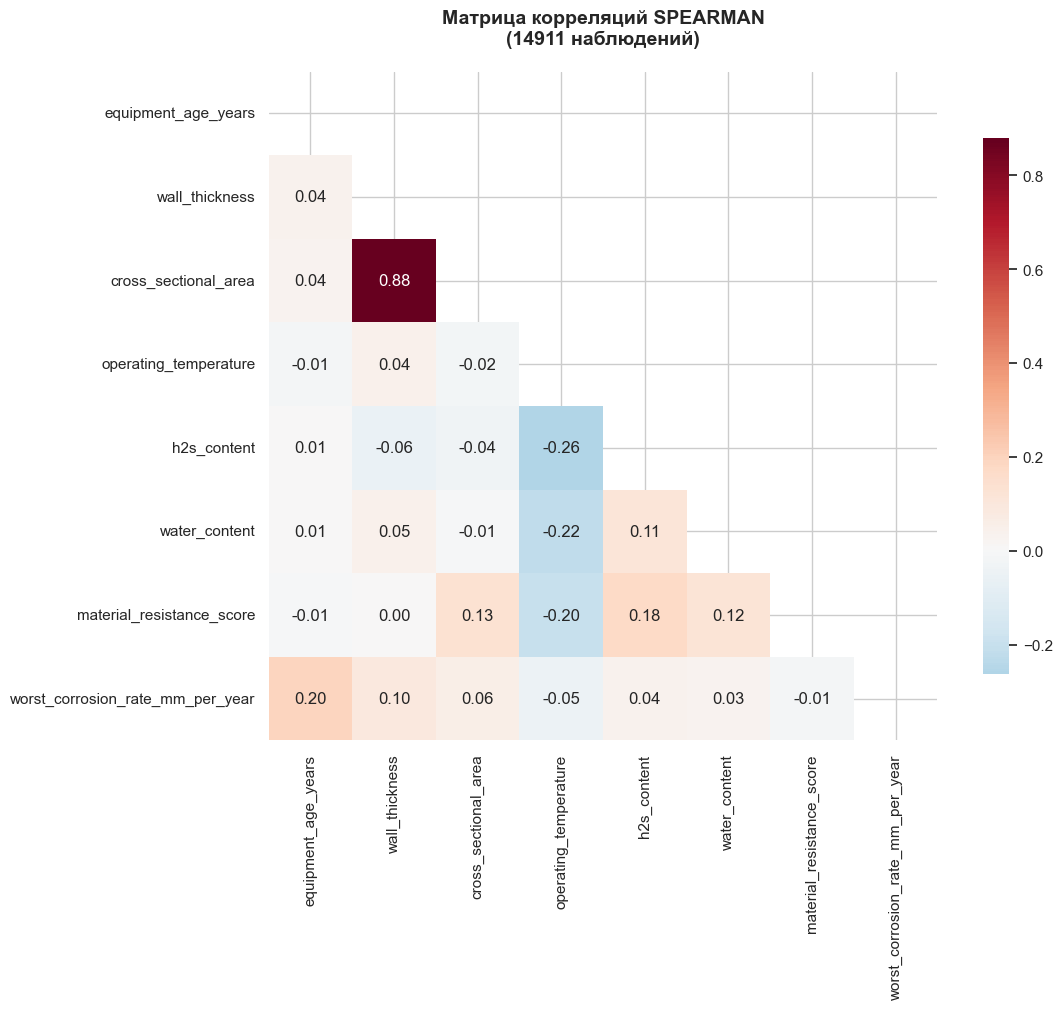

ТОП-7 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ SPEARMAN

📈 СТАТИСТИЧЕСКИ ЗНАЧИМЫЕ (p < 0.05):
  equipment_age_years            | r =   0.200 *** 🡅
  wall_thickness                 | r =   0.099 *** 🡅
  cross_sectional_area           | r =   0.059 *** 🡅
  operating_temperature          | r =  -0.051 *** 🡇
  h2s_content                    | r =   0.040 *** 🡅
  water_content                  | r =   0.032 *** 🡅

📊 Статистика:
   Всего значимых корреляций: 6
   Максимальная корреляция: 0.200
   Минимальная корреляция: 0.013


In [4]:
# 1. Инициализация с любыми данными
analyzer = AdvancedCorrosionAnalyzer(DF)

# 2. Установка целевой переменной
analyzer.set_target('worst_corrosion_rate_mm_per_year')

# 3. Анализ корреляций для конкретных колонок
features_to_analyze = ['h2s_content', 'water_content', 'operating_temperature', 
                      'material_resistance_score', 'wall_thickness', 'equipment_age_years','cross_sectional_area']

correlations = analyzer.analyze_correlations(
    feature_columns=features_to_analyze,
    method='spearman',
    top_k=15,
    plot_matrix=True
)


🔬 Тестируем набор: 1
   Признаки: ['operating_temperature', 'operating_pressure', 'material_resistance_score']
📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0018 | MAE =  0.0447 | RMSE =  0.0787
   random_forest   | R² =  0.0363 | MAE =  0.0444 | RMSE =  0.0773

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.0363)

🔬 Тестируем набор: 2
   Признаки: ['cross_sectional_area', 'component_type_id', 'nominal_thickness_mmc', 'h2s_content', 'operating_temperature', 'operating_pressure', 'water_content']
📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0405 | MAE =  0.0536 | RMSE =  0.0958
   random_forest   | R² =  0.0540 | MAE =  0.0535 | RMSE =  0.0952

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.0540)

🔬 Тестируем набор: 3
   Признаки: ['h2s_content', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years']
📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.1027 | MAE =  0.0497 | RMSE =  0.0927
   random_forest   | R² =  0.2955 | MAE =  0.0400 

<Figure size 1200x600 with 0 Axes>

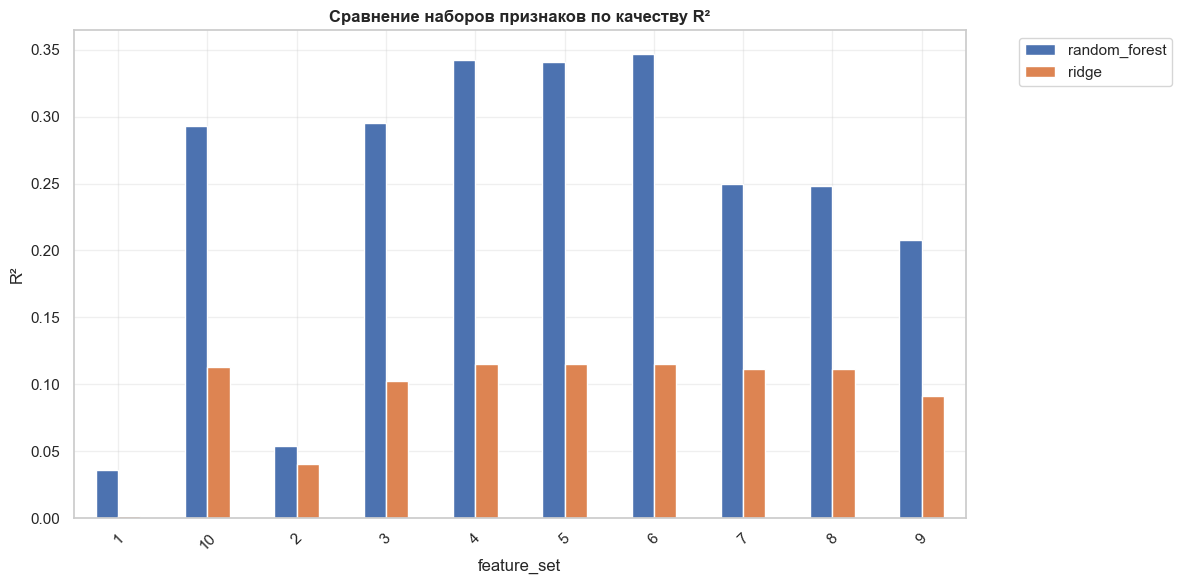

In [5]:
# 5. Сравнение разных наборов признаков
feature_sets = {
    '1': ['operating_temperature', 'operating_pressure', 'material_resistance_score'],
    '2': ['cross_sectional_area','component_type_id','nominal_thickness_mmc','h2s_content','operating_temperature','operating_pressure','water_content'],
    '3': ['h2s_content', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years'],
    '4': ['h2s_content', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id'],
    '5': ['h2s_aggressiveness_index', 'h2s_content', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id'],
    '6': ['h2s_content', 'h2s_water_ratio', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id'],
    '7': ['h2s_content', 'h2s_water_ratio','h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id'],
    '8': ['h2s_content', 'h2s_water_ratio','h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id','chloride_aggressiveness'],
    '9': ['h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id','underdeposit_corrosion_index'],
    '9': ['h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id','underdeposit_corrosion_index'],
    '10': ['h2s_content', 'h2s_water_ratio','h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id','corrosion_protection_index','cross_sectional_area'],

}

comparison = analyzer.compare_feature_sets(feature_sets)


🔬 Тестируем набор: 10
   Признаки: ['h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id', 'corrosion_protection_index', 'stress_corrosion_index']
📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.1111 | MAE =  0.0478 | RMSE =  0.0798
   random_forest   | R² =  0.2500 | MAE =  0.0396 | RMSE =  0.0733

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.2500)

🔬 Тестируем набор: 11
   Признаки: ['h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id', 'corrosion_protection_index']
📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.1111 | MAE =  0.0478 | RMSE =  0.0798
   random_forest   | R² =  0.2479 | MAE =  0.0396 | RMSE =  0.0734

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.2479)

📋 Сводная таблица по наборам признаков (Random Forest):
                  R2 Random Forest  MAE Random Forest
Набор параметров     

<Figure size 1200x600 with 0 Axes>

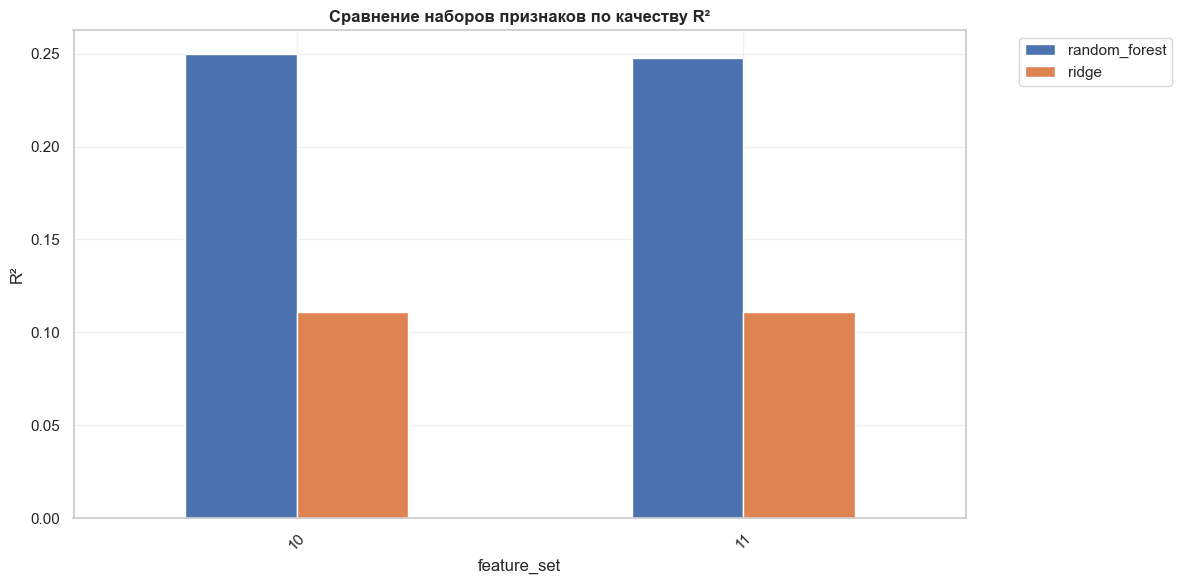

In [6]:
# 5. Сравнение разных наборов признаков
feature_sets = {
    '10': ['h2s_content', 'h2s_water_ratio','h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id','corrosion_protection_index','stress_corrosion_index'],
    '11': ['h2s_content', 'h2s_water_ratio','h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id','corrosion_protection_index'],

}
 

comparison = analyzer.compare_feature_sets(feature_sets)


🔬 Тестируем набор: baseline
   Признаки: ['h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id', 'stress_corrosion_index']
📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.1111 | MAE =  0.0478 | RMSE =  0.0798
   random_forest   | R² =  0.2471 | MAE =  0.0396 | RMSE =  0.0734

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.2471)

📋 Сводная таблица по наборам признаков (Random Forest):
                  R2 Random Forest  MAE Random Forest
Набор параметров                                     
baseline                    0.2471             0.0396


<Figure size 1200x600 with 0 Axes>

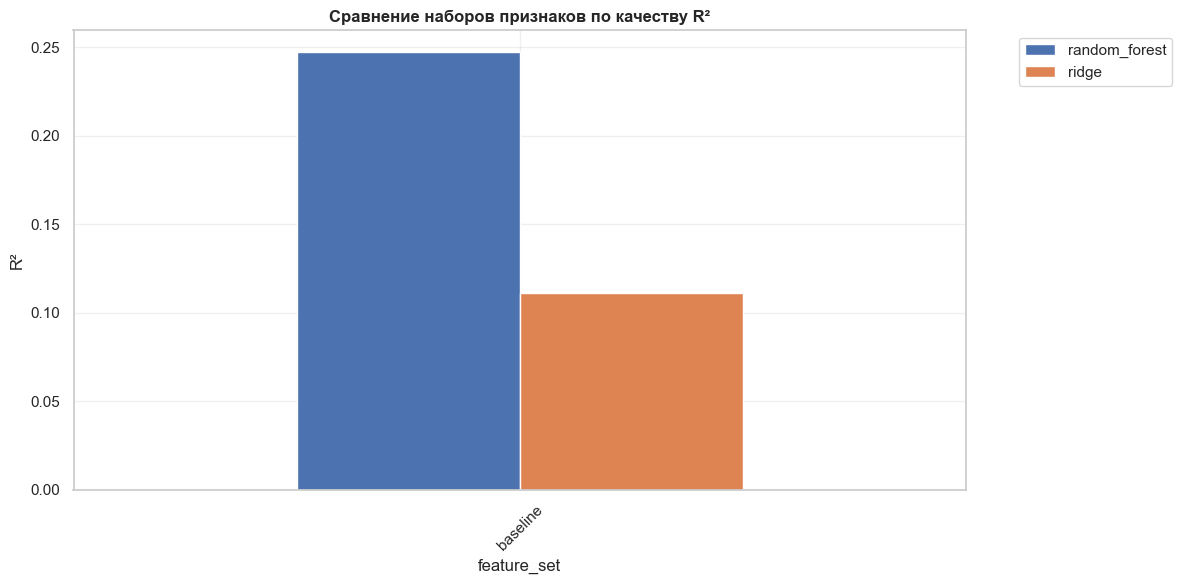

In [7]:
# 6. Сравнение разных наборов признаков
feature_sets = {
    'baseline': ['h2s_content', 'h2s_water_ratio','h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id','stress_corrosion_index'],

    
}


comparison = analyzer.compare_feature_sets(feature_sets)